In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Brownian Motion

$$\begin{align}
B_0 &= 0 \\
B_{n\Delta t} &= B_{(t-1)\Delta t} + \sqrt{\Delta t} z_n
\end{align}$$

where $z_n \sim \mathcal{N}(0,1)$.

In [28]:
# Alternatively we can drop the T variable and merely stipulate an increment + number of points to compute
def BM_path(T, time_points):
    increment = T/time_points
    trajectory = [0]
    for i in range(time_points):
        realization = trajectory[-1]+np.sqrt(increment)*np.random.normal()
        trajectory.append(realization)
    return trajectory

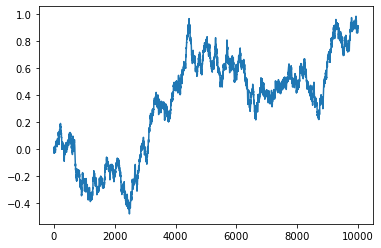

In [108]:
# to-do: x-axis should be scaled to end with value T
plt.plot(BM_path(1,10000))

# Poisson process (MIGHT NOT BE CORRECT. CHECK LATER)

The random numbers with exponential distribution can be computed using `numpy.random.exponential`:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

The exponential function above uses a different parameter $\beta = 1/\lambda$.

In [83]:
def poisson_path(intensity,T,time_points):
    #parameters & discretization
    time_points -= 1
    increment = T/time_points
    beta = 1/intensity
    
    #generating trajectory for s process
    s_trajectory = [0]
    for i in range(time_points):
        realization = s_trajectory[-1]+np.random.exponential(beta)
        s_trajectory.append(realization)
    
    #poisson trajectory
    poisson_trajectory = [0]
    for i in range(1,time_points+1):
        realization = max([k for k in range(0,time_points) if s_trajectory[k] <= i*increment])
        poisson_trajectory.append(realization)
    
    return poisson_trajectory

[0, 2, 5, 7, 7, 7, 7, 10, 11, 11, 12, 13, 13, 16, 17, 19, 21, 22, 22, 22, 24, 24, 27, 28, 28, 28, 28, 28, 28, 28]


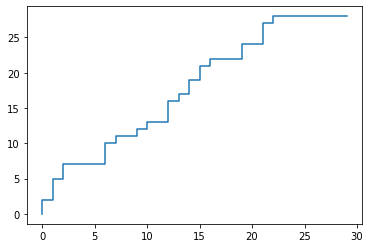

In [84]:
p = poisson_path(1, 30, 30)
plt.step([i for i in range(0,30)],p)
print(p)

Same as above but with the method described by the professor in the slides.

In [95]:
def poisson_path_2(intensity, T, time_points):
    #parameters & discretization
    time_points -= 1
    increment = T/time_points
    beta = 1/intensity
    
    #generating trajectory for s process
    s_trajectory = [0]
    for i in range(time_points):
        realization = s_trajectory[-1]-np.log(np.random.uniform())/intensity
        s_trajectory.append(realization)
    
    #poisson trajectory
    poisson_trajectory = [0]
    for i in range(1,time_points+1):
        realization = max([k for k in range(0,time_points+1) if s_trajectory[k] <= i*increment])
        poisson_trajectory.append(realization)
    
    return poisson_trajectory

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


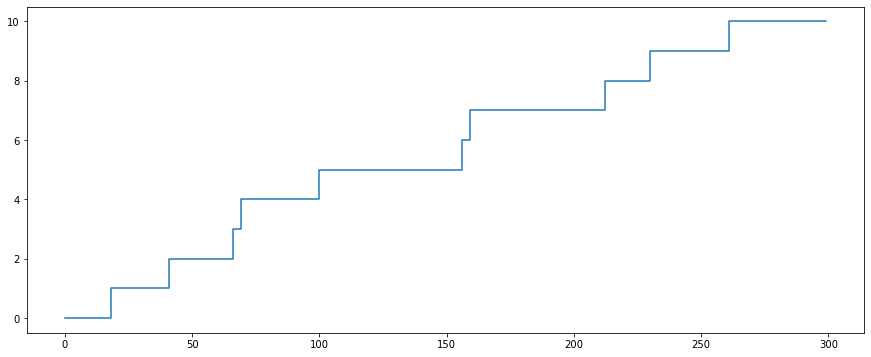

In [106]:
p = poisson_path_2(0.5, 30, 300)
plt.figure(figsize = (15,6))
plt.step([i for i in range(0,300)],p)
print(p)

# Discretizing the Lévy measure

$$ \nu(dx) = d \frac{\exp(bx/a)}{x \sinh(\pi x /a)} \, dx$$

In [112]:
def m_density(x):
    # model parameters
    a = 0.1231
    b = -0.5875
    d = 3.3588
    return d*(np.exp(b*x/a))/(x*np.sinh(np.pi*x/a))

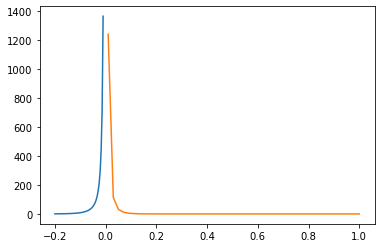

In [130]:
plt.plot(np.linspace(-0.2,-0.01), [m_density(x) for x in np.linspace(-0.2,-0.01)])
plt.plot(np.linspace(0.01,1), [m_density(x) for x in np.linspace(0.01,1)])

$$ F_x(y) = \int_\alpha^y d \frac{\exp(bx/a)}{x \sinh(\pi x /a)} \, dx - C$$
where $\alpha$ is the root found in the previous iteration and $$C = \int_{-1}^{-0.9} d \frac{\exp(bx/a)}{x \sinh(\pi x /a)} \, dx$$
then apply the bissection root-finding algorithm.

In [152]:
import scipy.integrate as integrate
from scipy import optimize

# an interval here is identified with a list with two numbers representing the interval's endpoints
def l_length(interval : list):
    return np.abs(interval[1] - interval[0])

#the initial interval is chosen more or less arbitrarily
init_interval = [-1,-0.9]
C = integrate.quad(m_density, init_interval[0], init_interval[1])[0]


# delta is the minimum size of intervals we wish to consider. After our intervals' size surpasses delta, the algo stops.
delta = C*10**(-2)

iter_interval = [init_interval[1], init_interval[1] + l_length(init_interval)]
while l_length(iter_interval) > delta:
    print(iter_interval)
    Fx = lambda y : integrate.quad(m_density, iter_interval[0], y)[0] - C
    root = optimize.bisect(Fx, iter_interval[0], iter_interval[1])
    iter_interval = [root, root + l_length(iter_interval)]
    

[-0.9, -0.8]
[-0.8709179195153413, -0.7709179195153413]
[-0.8532904745399721, -0.7532904745399721]
[-0.8406073621372345, -0.7406073621372345]
[-0.8306958319357365, -0.7306958319357365]
[-0.8225601329715573, -0.7225601329715573]
[-0.8156601582595613, -0.7156601582595613]
[-0.8096699254980194, -0.7096699254980194]
[-0.8043775041092884, -0.7043775041092885]
[-0.7996373313813818, -0.6996373313813818]
[-0.7953451053617753, -0.6953451053617753]
[-0.7914235303018357, -0.6914235303018357]
[-0.7878137309104203, -0.6878137309104203]
[-0.7844698284825425, -0.6844698284825426]
[-0.7813553770189173, -0.6813553770189174]
[-0.7784409428466461, -0.6784409428466461]
[-0.7757024139107672, -0.6757024139107672]
[-0.7731197897272069, -0.6731197897272069]
[-0.7706762968096883, -0.6706762968096883]
[-0.7683577298725142, -0.6683577298725142]
[-0.7661519529909131, -0.6661519529909131]
[-0.7640485162890404, -0.6640485162890404]
[-0.7620383574481825, -0.6620383574481825]
[-0.7601135664750476, -0.6601135664750476

[-0.6397127403382986, -0.5397127403382986]
[-0.6395824945953866, -0.5395824945953867]
[-0.639452626247665, -0.539452626247665]
[-0.6393231331239878, -0.5393231331239878]
[-0.6391940130648509, -0.5391940130648509]
[-0.639065263931123, -0.539065263931123]
[-0.638936883604045, -0.538936883604045]
[-0.6388088699823204, -0.5388088699823205]
[-0.638681220982115, -0.538681220982115]
[-0.6385539345370568, -0.5385539345370568]
[-0.638427008598236, -0.538427008598236]
[-0.6383004411342054, -0.5383004411342054]
[-0.6381742301338902, -0.5381742301338902]
[-0.6380483735949469, -0.538048373594947]
[-0.6379228695412253, -0.5379228695412254]
[-0.6377977160053067, -0.5377977160053067]
[-0.6376729110401443, -0.5376729110401444]
[-0.6375484527161548, -0.5375484527161548]
[-0.6374243391153954, -0.5374243391153954]
[-0.6373005683402966, -0.5373005683402966]
[-0.6371771385049301, -0.5371771385049301]
[-0.6370540477437404, -0.5370540477437404]
[-0.636931294199903, -0.536931294199903]
[-0.6368088760369662, -0

[-0.6085015779827013, -0.5085015779827013]
[-0.6084366968149193, -0.5084366968149193]
[-0.6083719097689252, -0.5083719097689252]
[-0.6083072165740531, -0.5083072165740531]
[-0.6082426169596373, -0.5082426169596373]
[-0.6081781106550124, -0.5081781106550124]
[-0.608113697392423, -0.5081136973924231]
[-0.6080493769041142, -0.5080493769041142]
[-0.6079851489223304, -0.5079851489223304]
[-0.6079210131851371, -0.5079210131851372]
[-0.6078569694276896, -0.5078569694276897]
[-0.607793017385143, -0.507793017385143]
[-0.6077291567984733, -0.5077291567984733]
[-0.6076653874057458, -0.5076653874057458]
[-0.6076017089479367, -0.5076017089479368]
[-0.6075381211689321, -0.5075381211689322]
[-0.607474623809708, -0.507474623809708]
[-0.6074112166112402, -0.5074112166112402]
[-0.6073478993232359, -0.5073478993232359]
[-0.6072846716895813, -0.5072846716895814]
[-0.6072215334570732, -0.5072215334570732]
[-0.6071584843754185, -0.5071584843754186]
[-0.607095524191414, -0.507095524191414]
[-0.60703265265767

[-0.5911340588689582, -0.4911340588689582]
[-0.5910900896153561, -0.49109008961535616]
[-0.5910461637031783, -0.49104616370317833]
[-0.5910022810451133, -0.49100228104511334]
[-0.5909584415567603, -0.49095844155676027]
[-0.5909146451537178, -0.49091464515371785]
[-0.5908708917515847, -0.4908708917515847]
[-0.5908271812688705, -0.4908271812688705]
[-0.5907835136182635, -0.49078351361826356]
[-0.5907398887182732, -0.49073988871827323]
[-0.5906963064844982, -0.49069630648449825]
[-0.5906527668325374, -0.49065276683253745]
[-0.5906092696809003, -0.49060926968090035]
[-0.5905658149480962, -0.49056581494809626]
[-0.590522402549724, -0.490522402549724]
[-0.5904790324042926, -0.4904790324042926]
[-0.5904357044303117, -0.4904357044303117]
[-0.59039241854338, -0.49039241854338]
[-0.5903491746649172, -0.49034917466491723]
[-0.5903059727134325, -0.49030597271343257]
[-0.5902628126074353, -0.4902628126074353]
[-0.5902196942654347, -0.49021969426543477]
[-0.5901766176088507, -0.4901766176088507]
[-0

[-0.5784361578160818, -0.47843615781608184]
[-0.5784030939743894, -0.4784030939743894]
[-0.5783700546875986, -0.47837005468759863]
[-0.5783370399178746, -0.4783370399178746]
[-0.5783040496302926, -0.4783040496302926]
[-0.5782710837870179, -0.4782710837870179]
[-0.5782381423531258, -0.4782381423531258]
[-0.5782052252936917, -0.4782052252936917]
[-0.5781723325708806, -0.47817233257088065]
[-0.578139464149768, -0.47813946414976805]
[-0.5781066199954292, -0.47810661999542925]
[-0.5780738000700293, -0.4780738000700293]
[-0.5780410043386437, -0.4780410043386437]
[-0.5780082327663477, -0.47800823276634774]
[-0.5779754853182169, -0.4779754853182169]
[-0.5779427619564161, -0.47794276195641616]
[-0.5779100626489311, -0.4779100626489311]
[-0.577877387357927, -0.47787738735792706]
[-0.5778447360484793, -0.4778447360484793]
[-0.5778121086856632, -0.47781210868566326]
[-0.5777795052345542, -0.47777950523455426]
[-0.5777469256631381, -0.47774692566313814]
[-0.5777143699335799, -0.47771436993357996]
[

[-0.568542569712806, -0.46854256971280606]
[-0.5685161003305232, -0.46851610033052327]
[-0.5684896467079648, -0.4684896467079648]
[-0.5684632088247578, -0.4684632088247578]
[-0.5684367866663503, -0.46843678666635036]
[-0.5684103802094593, -0.46841038020945935]
[-0.568383989439533, -0.4683839894395331]
[-0.5683576143361987, -0.4683576143361987]
[-0.5683312548790836, -0.46833125487908367]
[-0.5683049110536359, -0.4683049110536359]
[-0.5682785828365724, -0.4682785828365724]
[-0.5682522702133412, -0.46825227021334126]
[-0.5682259731635698, -0.46822597316356984]
[-0.5681996916697957, -0.4681996916697957]
[-0.5681734257145569, -0.4681734257145569]
[-0.5681471752774804, -0.4681471752774804]
[-0.5681209403411039, -0.46812094034110396]
[-0.5680947208879652, -0.4680947208879652]
[-0.5680685169006019, -0.4680685169006019]
[-0.5680423283586415, -0.46804232835864157]
[-0.5680161552446218, -0.4680161552446218]
[-0.56798999754108, -0.46798999754108006]
[-0.5679638552305545, -0.4679638552305545]
[-0.5

KeyboardInterrupt: 

In [148]:
C

2.33779834541914e-08